In [2]:
import os
import pandas as pd
import datetime
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Exploratory Data Analysis

Next, carry out some appropriate EDA on the above time series, with the aim
of understanding key characteristics of the data, and discovering any statistical
associations. You may also wish to experiment with other transformations on
the provided data which you can think of.

Some things to consider are:

• Coverage - are there missing values? If so, how could these be handled?

• The quality of the data - are there any suspect values? If so how should
they be handled? can you verify these from independent sources?

• The time series structure of the data - how does this impact your analysis?

Note that there is no perfect solution to any issues you may come across, but
we want to know your reasoning.


In [3]:
merged_file = open("merged.pkl",'rb')
merged_df = pickle.load(merged_file)

open_file = open("Open.pkl",'rb')
open_df = pickle.load(open_file)

high_file = open("High.pkl",'rb')
high_df = pickle.load(high_file)

low_file = open("Low.pkl",'rb')
low_df = pickle.load(low_file)

close_file = open("Close.pkl",'rb')## Step 1
close_df = pickle.load(close_file)

volume_file = open("Volume.pkl",'rb')
volume_df = pickle.load(volume_file)

future_return1_file = open("future_return1.pkl",'rb')
future_return1_df = pickle.load(future_return1_file)

close_return_file = open("close_return.pkl",'rb')
close_return_df = pickle.load(close_return_file)

high_low_file = open("high_low.pkl",'rb')
high_low_df = pickle.load(high_low_file)

## Coverage

### Missing Values

In [4]:
sum(merged_df.isnull().any(axis=1))

0

There are no missing values in any row of the original dataset which means that when one price is present, all the other prices and volume data are also present.

Here we will do checks using the open prices as we can assume that all of its prices are missing if a single price data is missing and vice versa.

In [5]:
open_df.isnull().sum().sum()

1128562

In [6]:
open_df.isnull().sum().sum() / open_df.size

0.4609086405514427

In [7]:
sum(open_df.isnull().any(axis=1))

883

From the code snippets above, we can see that almost half of the transformed data has missing values. Furthermore, all the rows have at least one missing value.

In [8]:
np.busday_count('2015-01-02', '2018-06-29')

910

In [9]:
np.busday_count('2015-01-02', '2018-06-29') - open_df.shape[0]

27

We can also see that there are 27 missing business days in which we can assume that there are public holidays.

In [10]:
open_df.iloc[50:100]

,1PG,3PL,8IH,AAA,AAC,AAD,AAX,ABC,ABL,ABP,...,FAU,CDX,B2Y,HIP,IVZ,RZI,PRZ,WGB,SKO,WQG
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-16,1.740,2.41,0.460,50.16,1.595,2.140,0.315,4.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-17,1.720,2.40,0.460,50.16,1.590,2.170,0.310,4.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-18,1.680,2.26,0.470,50.16,1.580,2.180,0.310,4.34,NaN,2.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-19,1.740,2.35,0.500,50.16,1.570,2.190,0.295,4.36,NaN,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-20,1.970,2.35,0.500,50.15,1.605,2.150,0.300,4.42,NaN,2.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23,2.040,2.35,0.505,50.17,1.580,2.160,0.290,4.49,NaN,2.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-24,2.080,2.30,0.520,50.17,1.570,2.210,0.275,4.50,NaN,2.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-25,2.250,2.34,0.540,50.17,1.590,2.180,0.280,4.59,NaN,2.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-26,2.140,2.33,0.500,50.17,1.620,2.260,0.285,4.42,NaN,2.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After observing the dataset, we can see that most of the missing data comes from a period where a company have not been listed or delisted. However, there are cases where some of the data was missing in between dates. From now one, we will call these missing values as true missing values.

In [11]:
def count_consecutive(df, ticker):
    
    consecutive = df[[ticker]].copy()
    consecutive['is_null'] = consecutive.isnull()
    consecutive['crossing'] = (consecutive.is_null != consecutive.is_null.shift()).cumsum()
    consecutive['count'] = consecutive.groupby(['is_null', 'crossing']).cumcount(ascending=False) + 1
    consecutive.loc[consecutive.is_null == False, 'count'] = 0
    
    return consecutive

In [12]:
def find_true_missing(df, ticker):
    
    
    consecutive = count_consecutive(df, ticker)
    
    potential = True
    missing_list = []
    for date, row in consecutive.iterrows():
        if row['count'] > 5:
            potential = False
        if row['count'] == 0:
            potential = True
        if potential and row['count'] < 5 and row['count'] > 0:
            missing_list.append(date)
    return missing_list

In [13]:
missing_list = find_true_missing(open_df, 'AAJ')
missing_list[0:10]

[Timestamp('2015-01-22 00:00:00'),
 Timestamp('2015-02-16 00:00:00'),
 Timestamp('2015-02-17 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2015-03-04 00:00:00'),
 Timestamp('2015-03-05 00:00:00'),
 Timestamp('2015-04-27 00:00:00'),
 Timestamp('2015-04-29 00:00:00'),
 Timestamp('2015-05-06 00:00:00')]

In [14]:
open_df[['AAJ']].iloc[50:100]

,AAJ
Date,
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN
2015-03-20,NaN
2015-03-23,NaN
2015-03-24,NaN
2015-03-25,0.010
2015-03-26,0.010


We can see that ticker AAJ here have many true missing values and sometimes more than one week.

In [15]:
volume_df[['AAJ']].iloc[50:100]

,AAJ
Date,
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN
2015-03-20,NaN
2015-03-23,NaN
2015-03-24,NaN
2015-03-25,250000.0
2015-03-26,100000.0


The same thing is happening to its volume data.

Hence it will be better for our models if we drop the columns that have true missing values. Here we will drop the columns with more than two days of true missing, assuming that more than two consecutive values are not be workable for forecasting.

In [16]:
def drop_true_missing(df, ticker, days):
    
    
    consecutive = count_consecutive(df, ticker)
    
    found_first_number = False
    potential_drop = False
    more_than_days = False
    for date, row in consecutive.iterrows():
        if not pd.isna(row[ticker]):
            found_first_number = True
            if found_first_number and potential_drop:
                return True
        elif row['count'] > days:
            potential_drop = True
        
    return False

In [17]:
drop_true_missing(open_df, 'AAJ', 2)

True

In [18]:
drop_true_missing(open_df, '1PG', 2)

False

In [19]:
test = pd.DataFrame({"test":[1,None, None, 1, 1, None]})

In [20]:
drop_true_missing(test, 'test', 2)

False

In [21]:
test2 = pd.DataFrame({"test":[None, 1,None, None, None, 1, 1, None]})

In [22]:
drop_true_missing(test2, 'test', 2)

True

Since we know now that our function drop_true_missing is working well, We will iterate through the columns and get a sublist for the columns that we want to keep.

In [23]:
def sublist_good_columns(df):
    sublist = []
    for column in df:
        drop_column = drop_true_missing(df, column, 2)
        if not drop_column:
            sublist.append(column)
    return sublist

In [24]:
%%time
sublist = sublist_good_columns(open_df)

Wall time: 1min 17s


In [25]:
sublist

['1PG',
 '3PL',
 'AAA',
 'AAC',
 'AAD',
 'AAX',
 'ABC',
 'ABP',
 'ABX',
 'ACR',
 'ADJ',
 'AFI',
 'AGB',
 'AGF',
 'AGI',
 'AGL',
 'AHD',
 'AHE',
 'AHY',
 'AIA',
 'AIO',
 'AIZ',
 'AJA',
 'AJX',
 'AKP',
 'ALF',
 'ALK',
 'ALL',
 'ALQ',
 'ALU',
 'AMA',
 'AMC',
 'AMM',
 'AMP',
 'ANG',
 'ANI',
 'ANN',
 'ANZ',
 'AOG',
 'API',
 'APO',
 'AQG',
 'AQP',
 'ARF',
 'ARG',
 'ARI',
 'ARP',
 'ARU',
 'ASB',
 'ASL',
 'ASX',
 'ASZ',
 'AUB',
 'AUI',
 'AVB',
 'AVG',
 'AVJ',
 'AWC',
 'AWE',
 'AZJ',
 'AZZ',
 'BCI',
 'BEAR',
 'BEN',
 'BFG',
 'BGA',
 'BGL',
 'BHP',
 'BIT',
 'BKI',
 'BKL',
 'BKN',
 'BKW',
 'BKY',
 'BLA',
 'BLT',
 'BLX',
 'BLY',
 'BMN',
 'BNO',
 'BOQ',
 'BPT',
 'BRG',
 'BRU',
 'BSL',
 'BTT',
 'BUL',
 'BWP',
 'BXB',
 'CAB',
 'CAJ',
 'CAM',
 'CAT',
 'CCL',
 'CCP',
 'CCV',
 'CDA',
 'CFE',
 'CFU',
 'CGF',
 'CGH',
 'CHC',
 'CKF',
 'CL8',
 'CLH',
 'CLQ',
 'CMG',
 'CMW',
 'CNU',
 'COH',
 'CPU',
 'CQR',
 'CRZ',
 'CSL',
 'CSR',
 'CSV',
 'CTD',
 'CTN',
 'CTX',
 'CUP',
 'CUV',
 'CVN',
 'CVT',
 'CWE',
 'CWN',

In [26]:
len(sublist)

540

In [27]:
open_df.shape

(883, 2773)

From the process above, we are dropping 343 columns due to the abundance of missing values as discussed previously.

In [28]:
open_df = open_df[sublist]

In [29]:
open_df.shape

(883, 540)

Next we will forward fill the remainder of missing values assuming that there will not be any significant impact in prices in the span of two days.

Thus we need to create a function to drop the true missing values.

In [30]:
open_df = open_df.ffill(limit=2)

Now we will apply the same method to all the dataframes.

In [56]:
open_df = open_df[sublist]
open_df = open_df.ffill(limit=2)
open_df.to_pickle("open_sublist.pkl")

high_df = high_df[sublist]
high_df = high_df.ffill(limit=2)
high_df.to_pickle("high_sublist.pkl")

low_df = low_df[sublist]
low_df = low_df.ffill(limit=2)
low_df.to_pickle("low_sublist.pkl")

close_df = close_df[sublist]
close_df = close_df.ffill(limit=2)
close_df.to_pickle("close_sublist.pkl")

volume_df = volume_df[sublist]
volume_df = volume_df.ffill(limit=2)
volume_df.to_pickle("volume_sublist.pkl")

future_return1_df = future_return1_df[sublist]
future_return1_df = future_return1_df[sublist].ffill(limit=2)
future_return1_df.to_pickle("future_return1_sublist.pkl")

close_return_df = close_return_df[sublist]
close_return_df = close_return_df.ffill(limit=2)
close_return_df.to_pickle("close_return_sublist.pkl")

high_low_df = high_low_df[sublist]
high_low_df = high_low_df.ffill(limit=2)
high_low_df.to_pickle("high_low_sublist.pkl")

## Quality of Data

### Suspect Values

Financial data cannot be less than 0. Hence we can check if any data is less than 0.

In [32]:
open_df[open_df["AAX"] < 0].any()

1PG    False
3PL    False
AAA    False
AAC    False
AAD    False
       ...  
SIQ    False
TLG    False
UBI    False
ACO    False
ELD    False
Length: 540, dtype: bool

In [33]:
open_df[open_df["AAX"] < 0].any().any()

False

We can check the quality of data by checking the highlow ratio. If we detect a high absolute value for the highlow ratio, we can then check if the data is actually correct.

In [62]:
df = high_low_df.max()

In [68]:
df

1PG    1.312500
3PL    1.343874
AAA    1.001796
AAC    1.149254
AAD    1.335385
         ...   
SIQ    1.203390
TLG    1.219512
UBI    1.206897
ACO    1.142857
ELD    1.148649
Length: 540, dtype: float64

In [84]:
X = [i for i in range(len(df.index))]
Y = df.values

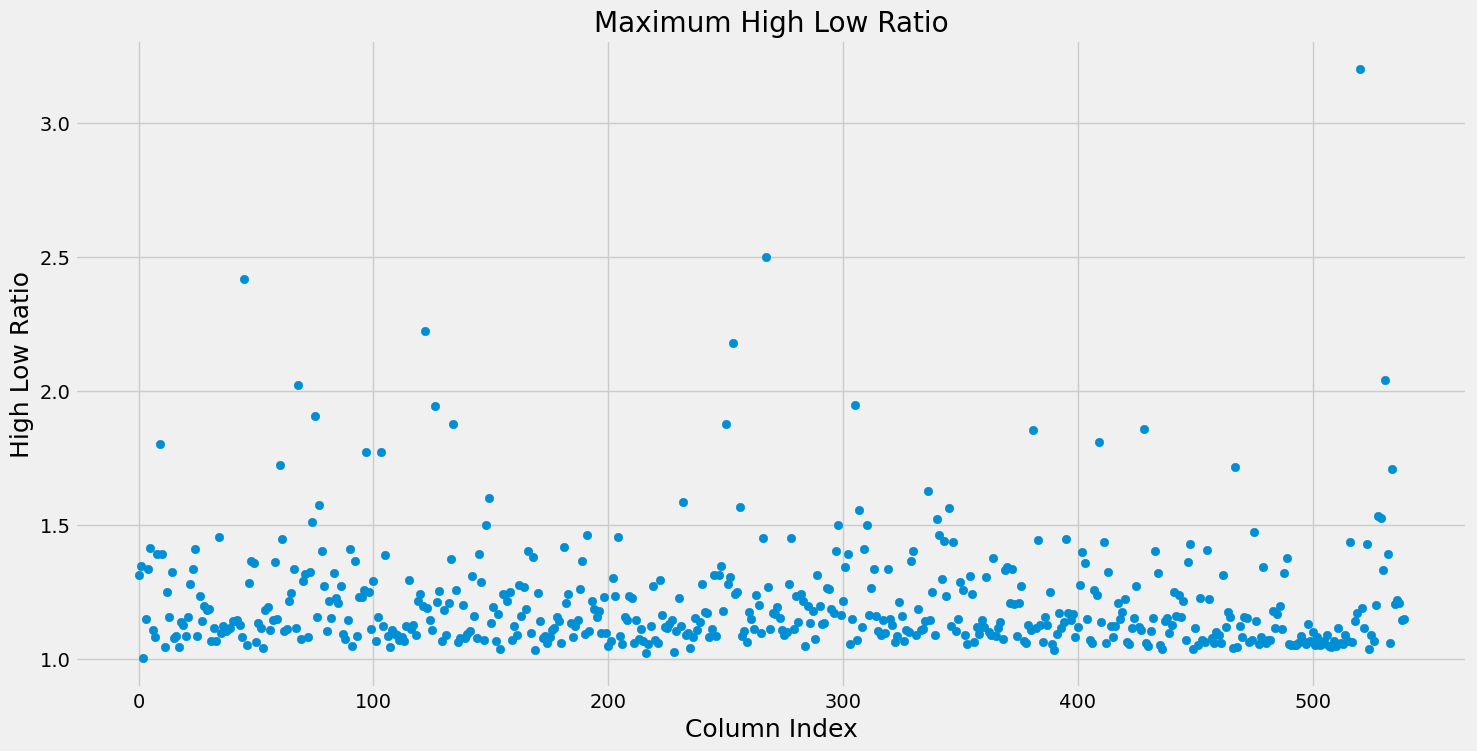

In [88]:
plt.figure(figsize=(16,8))
plt.scatter(X, Y)
plt.title('Maximum High Low Ratio')
plt.ylabel('High Low Ratio', fontsize=18)
plt.xlabel('Column Index', fontsize=18)
plt.savefig('MaxHighLowScatter.png')
plt.show()

In [58]:
df = high_low_df[high_low_df>3].any()

In [59]:
df[df == True]

BMB    True
dtype: bool

In [61]:
df

1PG    False
3PL    False
AAA    False
AAC    False
AAD    False
       ...  
SIQ    False
TLG    False
UBI    False
ACO    False
ELD    False
Length: 540, dtype: bool

In [36]:
df = high_low_df['BMB'] > 3

In [37]:
df[df==True]

Date
2015-02-13    True
Name: BMB, dtype: bool

In [38]:
df = volume_df['2015-02-12':'2015-02-18']

In [39]:
df[['BMB']]

,BMB
Date,
2015-02-12,529440.0
2015-02-13,13058877.0
2015-02-16,1745012.0
2015-02-17,65000.0
2015-02-18,412846.0


In [40]:
df = open_df['2015-02-12':'2015-02-18']

In [41]:
df[['BMB']]

,BMB
Date,
2015-02-12,0.016
2015-02-13,0.015
2015-02-16,0.010
2015-02-17,0.011
2015-02-18,0.013


However, It appears that this is the correct price as the volume spiked on the 13th of feb 2015. Looking at prices from https://au.investing.com/equities/balamara-resources-ltd-historical-data, we can see that prices are accurate to 2 decimal places.

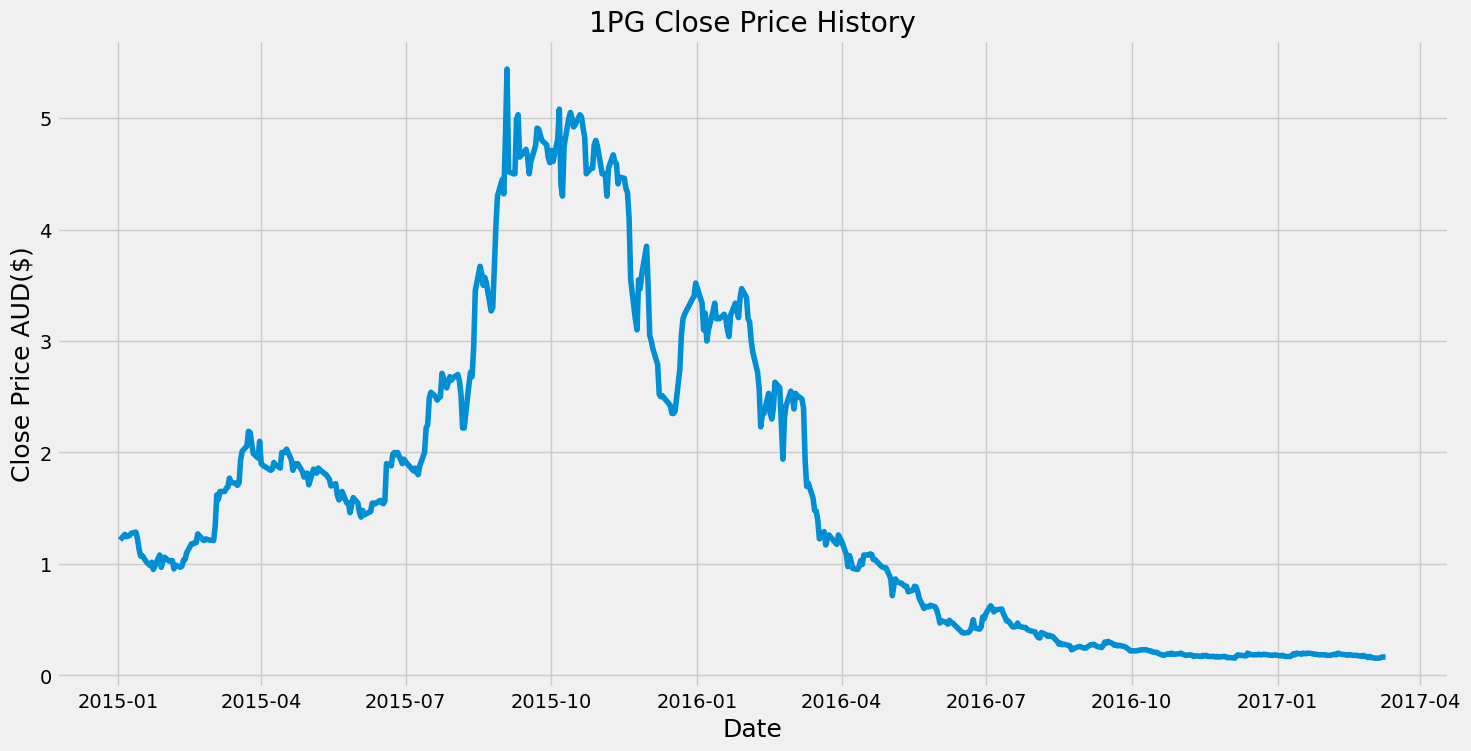

In [42]:
plt.figure(figsize=(16,8))
plt.title('1PG Close Price History')
plt.plot(close_df[['1PG']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price AUD($)', fontsize=18)
plt.show()

Time series to understand trends and patterns over time.

To give our models more information on the historical prices, we would like to give yesterday's volume percentage increase and see how it affects our models.